#모델 실행을 위한 설치 코드
> 묶음으로 실행

In [ ]:
!pip install --upgrade diffusers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 15.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylin

In [ ]:
!pip install --upgrade diffusers[flax]

In [ ]:
from diffusers import DiffusionPipeline
import torch
from diffusers import DDPMScheduler, UNet2DModel
from PIL import Image
import PIL
import requests
from diffusers import StableDiffusionInstructPix2PixPipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


In [ ]:
! python3 -m pip install --no-cache-dir xformers transformers[torch] ftfy datasets tensorboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.7/222.7 MB 274.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 189.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 343.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 288.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 298.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 268.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 311.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 285.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's

In [ ]:
!pip install diffusers accelerate safetensors transformers

In [ ]:
! accelerate config default

accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [ ]:
from accelerate.utils import write_basic_config
write_basic_config()

Configuration already exists at /root/.cache/huggingface/accelerate/default_config.yaml, will not override. Run `accelerate config` manually or pass a different `save_location`.


False

In [ ]:
%cd /content

/content


In [ ]:
#걍 이미지 처리 함수
def download_image(url):
   image = PIL.Image.open(requests.get(url, stream=True).raw)
   image = PIL.ImageOps.exif_transpose(image)
   image = image.convert("RGB")
   return image

from PIL import Image, ImageOps

def process_image(file_path):
    image = Image.open(file_path)
    image = ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    return image

#학습 시작

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#허깅 토큰 로그인 추가
## masking

In [ ]:
############
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline

## 변경 포인트 1 : 모델 변경

In [ ]:
#사용할 모델
#모델경로 지정 -> 링크에서 골라쓰기
#https://huggingface.co/heesun1
model_path = "heesun1/model_pix2pix" #모델 변경 여기
!export MODEL_NAME=model_path


In [ ]:
#모델 다운로드
model_id =model_path

pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")
generator = torch.Generator("cuda").manual_seed(0)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/710 [00:00<?, ?B/s]

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/783 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/780 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.83k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/783 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
#이미지를 저장할 경로 생성
!mkdir /content/edited_images

## 변경 포인트 2 : 파일 경로

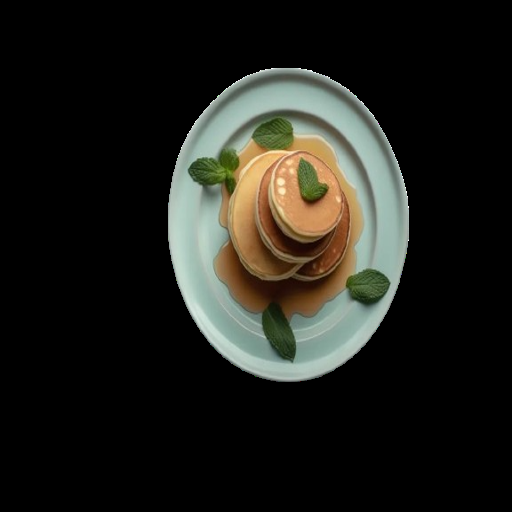

In [ ]:
# content 이미지 지정
from pathlib import Path
import os
######### 파일 경로 변경 ##########3
## remove.bg 로 배경 제거 후 업로드 한 사진 경로
file_path = '/content/drive/MyDrive'
file_path1 = Path(file_path)
file_name_without_ext = file_path1.stem
image = process_image(file_path)
image # 이미지 확인 (선택 사항)

## 변경 포인트 3,4 : 프롬프트, 가중치 변경


In [ ]:
#같은 프롬프트로 10번 돌려서 /content/edited_images/작가명이 생성되고 거기에 저장됨

####################프롬프트 지정############################
## GPT-4o에 style사진을 넣고 "describe the background within 15words" 후 프롬프트 생성
## 앞에 style사진의 작가명 추가해보는 등 여러가지 시도 해보기
prompt = "Lenka, Change the background to a rustic, dark textured surface with subtle shadows to create depth and contrast"
#############################################################


###################가중치 조정 ##############################
# 이미지 생성 시 반복 단계 수
num_inference_steps = 100
# 이미지 특징 강조 (높을수록 텍스트를 따르려는 경향이 강해짐)
image_guidance_scale = 2
# 초기입력을 얼마나 강하게 고려할지 (높을수록 텍스트와 밀접)
guidance_scale = 4
#############################################################

# edited_image = pipe(prompt,
#    image=image,
#    num_inference_steps=num_inference_steps,
#    image_guidance_scale=image_guidance_scale,
#    guidance_scale=guidance_scale,
#    generator=generator,
# ).images[0]
for i in range(10):
  edited_image = pipe(prompt,
   image=image,
   num_inference_steps=num_inference_steps,
   image_guidance_scale=image_guidance_scale,
   guidance_scale=guidance_scale,
   generator=generator,).images[0]
  #새로운 폴더 생성
  w_dir = f'/content/edited_images/{file_name_without_ext}'
  os.makedirs(w_dir, exist_ok = True)
  edited_image.save(f"{w_dir}/{file_name_without_ext}{i}.png")

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

## 변경 포인트 5 : 파일 저장 경로

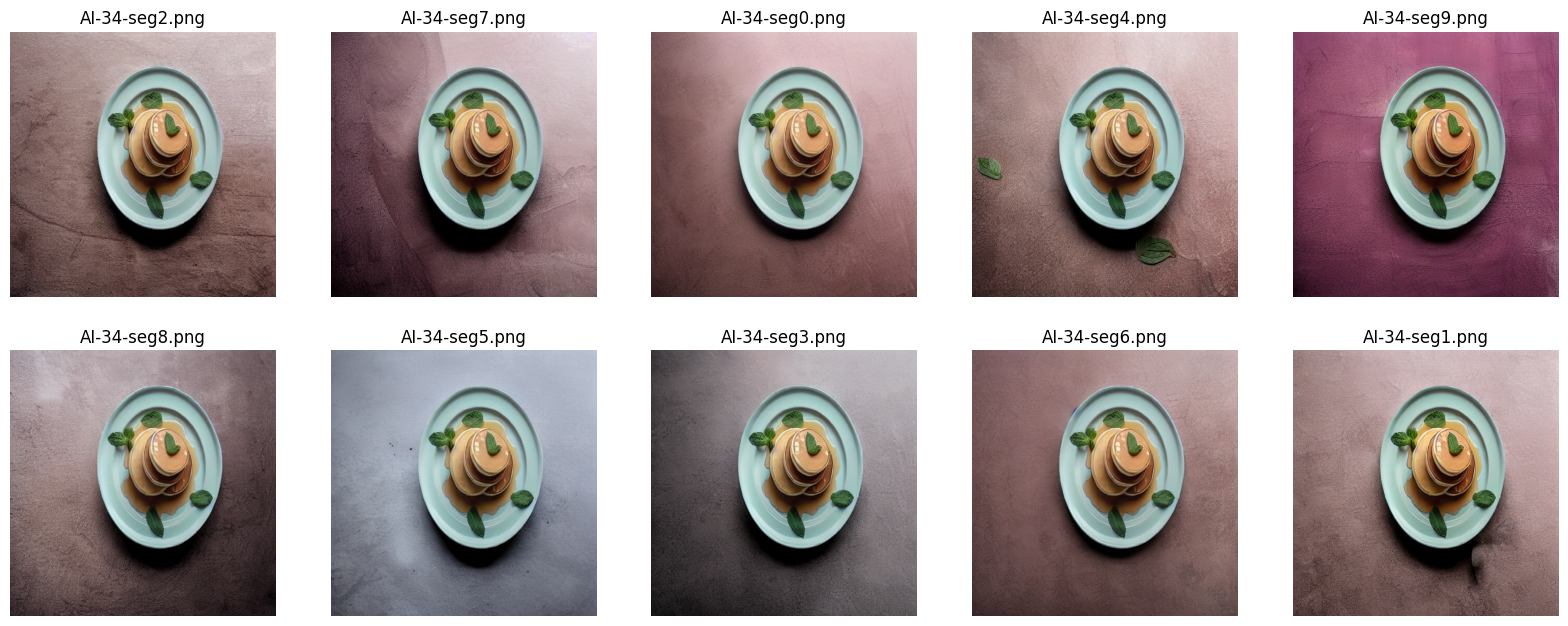

In [ ]:
from google.colab import drive
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 1. Google Drive를 마운트합니다.

### 여기 파일 저장 경로 변경
# 2. 이미지가 저장된 폴더 경로를 설정 -> 폴더에있는 모든 이미지 출력.
folder_path = '/content/edited_images/AI-34-seg'  # 여기에 실제 이미지 폴더 경로를 입력하세요.

# 3. 폴더 내 모든 이미지 파일을 리스트로 가져옵니다.
image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg', 'png', 'gif'))]

# 4. 이미지 파일을 한 번에 모두 출력합니다.
plt.figure(figsize=(20, 20))
for i, image_file in enumerate(image_files):
    img_path = os.path.join(folder_path, image_file)
    img = mpimg.imread(img_path)
    plt.subplot(5, 5, i + 1)  # 5x5 그리드로 이미지 배치 (필요시 조정)
    plt.imshow(img)
    plt.axis('off')
    plt.title(image_file)

plt.show()

# 결과 저장

## 변경 포인트 6 : 구글 드라이브 경로 변경

In [ ]:
import os
import shutil

In [ ]:

## 여기 구글드라이브 경로 변경
## 2조의 Diff_final_res 폴더를 본인의 드라이브에 바로가기 추가한 후
## 모델명에 맞는 폴더의 주석을 풀고 저장하시면 됨미당~
drive_folder = '/content/drive/MyDrive/Diff_final_res/heesun1 difu_model_1000_500'
#drive_folder = '/content/drive/MyDrive/Diff_final_res/heesun1 difu_model_2000'
#drive_folder = '/content/drive/MyDrive/Diff_final_res/heesun1 model_pix2pix'
#drive_folder = '/content/drive/MyDrive/Diff_final_res/heesun1 model_pix2pix_1500'

local_folder = folder_path
# 3. 드라이브 폴더가 존재하지 않으면 생성합니다.
if not os.path.exists(drive_folder):
    os.makedirs(drive_folder)

# 4. 로컬 폴더를 드라이브 폴더로 이동합니다.
shutil.move(local_folder, drive_folder)